In [ ]:
import zipfile
file=zipfile.ZipFile('emails.csv.zip')
file.extractall()

In [1]:
import pandas  as pd
df=pd.read_csv('emails.csv')

In [ ]:
df.head()

In [ ]:
df["message"][0].split("\n") 

In [2]:
import re
def create_dataframe(series):
    data = []
    #for line in series.split('\n'):
        #data.append(dict(re.findall(r"(Message-ID|Date|From|To|Subject|Mime-Version|Content-Type|Content-Transfer-Encoding|X-From|X-To|X-cc|X-bcc|X-Folder|X-Origin|X-FileName)\s*:\s*([^\s]+)", line)))
        #data1={k:v for element in data for k,v in element.items()}
#    data1={}
    d=' '.join(series.split('\n')[15:]).strip()
    return d

In [3]:
df['text'] = df['message'].map(create_dataframe)
#df_splited = pd.DataFrame.from_records(df1).fillna("")

In [4]:
print(df.shape)

(517401, 3)


In [8]:
df=df.drop(columns=['file','message'])

In [9]:
df=df.drop_duplicates()

In [10]:
df.shape

(313411, 1)

In [11]:
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
stop = stopwords.words('english')
#tag=0
#emo=0
def tokenizer(text):
    #global tag,emo
    #text = re.sub('<[^>]*>', '', text)
    #if re.findall('<[^>]*>', text):
        #tag += 1
    #emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    #if emoticons:
        #emo += 1
    text = re.sub('[\W]+', ' ', text.lower()) #+ ' '.join(emoticons).replace('-', '')
    tokenized = [w for w in text.split() if w not in stop]
    #tokenized = [WordNetLemmatizer().lemmatize(w) for w in tokenized]
    #tokenized = [PorterStemmer().stem(w) for w in tokenized]
    t=' '.join(tokenized)
    return t

<>:16: SyntaxWarning: invalid escape sequence '\W'
<>:16: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Shabnam\AppData\Local\Temp\ipykernel_4076\3165921716.py:16: SyntaxWarning: invalid escape sequence '\W'
  text = re.sub('[\W]+', ' ', text.lower()) #+ ' '.join(emoticons).replace('-', '')


In [12]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#count = CountVectorizer()
tfidf = TfidfVectorizer()#use_idf=True, norm='l2', smooth_idf=True)
#np.set_printoptions(precision=2)
x_train = tfidf.fit_transform(list(df['text']))
print(x_train)

  (0, 333950)	0.8119720968169595
  (0, 498301)	0.3409445386318518
  (0, 389744)	0.2184174964758178
  (0, 365624)	0.4204187588595683
  (1, 608139)	0.0442221944072642
  (1, 469049)	0.06200588831575983
  (1, 580838)	0.11126072874556951
  (1, 332807)	0.11508533360811757
  (1, 398168)	0.12528338676548914
  (1, 218841)	0.12640608444662024
  (1, 576423)	0.24359142846612988
  (1, 544140)	0.11661292421745184
  (1, 350367)	0.10716467603559181
  (1, 513629)	0.08678051132860543
  (1, 195638)	0.09386142834038858
  (1, 349795)	0.05621736468976112
  (1, 649726)	0.061415003315352525
  (1, 592397)	0.10696287821698044
  (1, 471116)	0.04687447113245815
  (1, 334274)	0.08976832532663521
  (1, 284124)	0.06330390943046885
  (1, 598139)	0.08120832538545175
  (1, 554141)	0.09350190280182505
  (1, 383048)	0.026931277958968505
  (1, 364879)	0.07895522336094302
  :	:
  (313410, 497851)	0.02503825640966679
  (313410, 611258)	0.024666726688404216
  (313410, 484104)	0.08725780766736015
  (313410, 649519)	0.01658378

In [14]:
import numpy as np
from sklearn.decomposition import TruncatedSVD 

model = TruncatedSVD(n_components=2, random_state=42)
x_train_r=model.fit_transform(x_train) 

In [23]:
from sklearn.decomposition import PCA
# initializing the PCA transformer
pca = PCA(n_components=2)
# dimensionality reduction:
x_train_pca = pca.fit_transform(x_train.todense())

MemoryError: Unable to allocate 1.55 TiB for an array with shape (313411, 678583) and data type float64

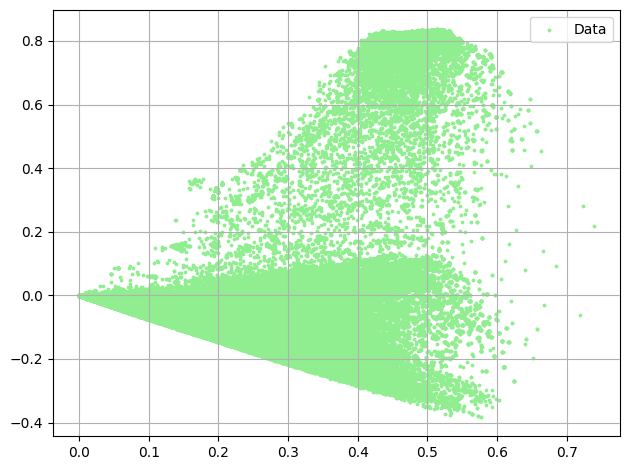

In [15]:
import matplotlib.pyplot as plt
plt.scatter(x_train_r[:, 0], x_train_r[:, 1], s=3, c='lightgreen', label='Data')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans( n_clusters=2, max_iter=100, n_init=1, random_state=1).fit(x_train_r)
cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
print(f"Number of elements assigned to cluster {cluster_ids}: {cluster_sizes}")

Number of elements assigned to cluster [0 1]: [295771  17640]


In [17]:
y=KMeans.predict(kmeans, x_train_r)
kmeans.cluster_centers_.shape

(2, 2)

In [18]:
kmeans.cluster_centers_[:,0:2]

array([[ 0.21020232, -0.08853249],
       [ 0.4614607 ,  0.73516702]])

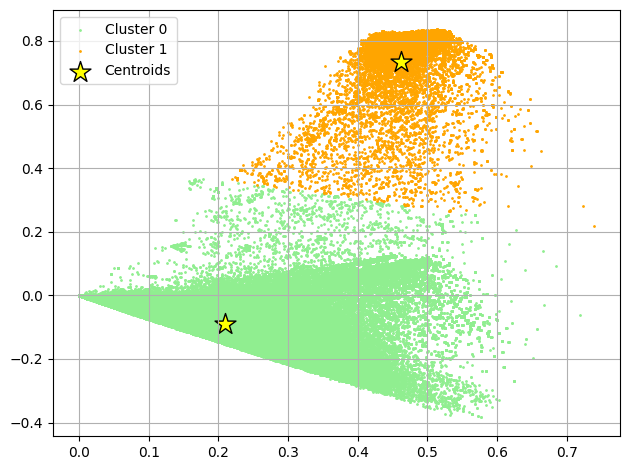

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x_train_r[y == 0, 0], x_train_r[y == 0, 1], s=1, c='lightgreen', label='Cluster '+str(cluster_ids[0]))
plt.scatter(x_train_r[y == 1, 0], x_train_r[y == 1, 1], s=1, c='orange', label='Cluster '+str(cluster_ids[1]))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='yellow', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [20]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x_train_r,kmeans.labels_, metric='euclidean', sample_size=10000 )
print(score)

0.814565028338078
